<a href="https://colab.research.google.com/github/DreamWalker1412/Colab/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import related libraries

In [ ]:
%tensorflow_version 2.x
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.utils import get_file,to_categorical
from keras.layers import Dense,Dropout,Input
import pandas as pd
import seaborn as sns

print(keras.__version__)

2.3.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Prepare dataset(MNIST)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


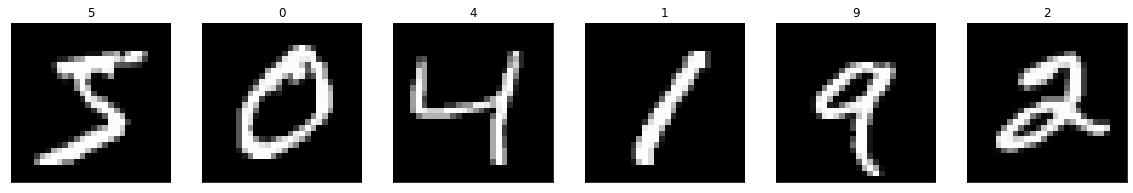

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# data visualization
fig = plt.figure(figsize = (20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6,i + 1, xticks = [], yticks = [])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

# image preprocessing
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255.

# change feature dimension
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Build network

In [ ]:
# use a fully connected work
input_img = Input(shape=(len(x_train[1]),))
## encoder
encoder = Dense(128,activation="relu",name="enco1")(input_img)
encoder = Dense(64,activation="relu",name="enco2")(encoder)
encoder = Dense(32,activation="relu",name="enco3")(encoder)
encoder = Dense(16,activation="relu",name="enco4")(encoder)
encoder = Dense(8,activation="relu",name="enco5")(encoder)
## decoder
decoder = Dense(16,activation="relu",name="deco1")(encoder)
decoder = Dense(32,activation="relu",name="deco2")(decoder)
decoder = Dense(64,activation="relu",name="deco3")(decoder)
decoder = Dense(128,activation="relu",name="deco4")(decoder)
decoder = Dense(len(x_train[1]),activation="relu",name="deco5")(decoder)
## combined to autoencoder
autoencoder = Model(input=input_img, output=decoder)
autoencoder.summary()
## compile
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
enco1 (Dense)                (None, 128)               100480    
_________________________________________________________________
enco2 (Dense)                (None, 64)                8256      
_________________________________________________________________
enco3 (Dense)                (None, 32)                2080      
_________________________________________________________________
enco4 (Dense)                (None, 16)                528       
_________________________________________________________________
enco5 (Dense)                (None, 8)                 136       
_________________________________________________________________
deco1 (Dense)                (None, 16)                144 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


Fit model

In [ ]:
autoencoder_fit = autoencoder.fit(x_train,x_train,batch_size=256,epochs=100,
                        validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3433 - val_loss: 0.3334
Epoch 2/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3314 - val_loss: 0.3271
Epoch 3/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3455 - val_loss: 0.3346
Epoch 4/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3414 - val_loss: 0.3333
Epoch 5/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3376 - val_loss: 0.3302
Epoch 6/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3296 - val_loss: 0.3259
Epoch 7/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3353 - val_loss: 0.3342
Epoch 8/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3422 - val_loss: 0.3346
Epoch 9/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3567 - val_loss: 0.3

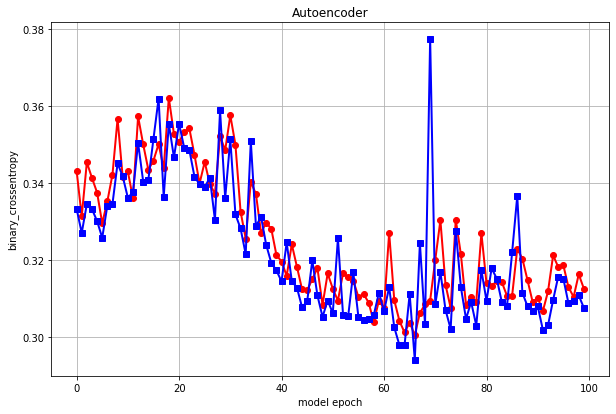

In [ ]:
plt.figure(figsize=(10,6.5))
plt.plot(autoencoder_fit.epoch,autoencoder_fit.history["loss"],"ro-",lw=2)
plt.plot(autoencoder_fit.epoch,autoencoder_fit.history["val_loss"],"bs-",lw=2)
plt.grid()
plt.xlabel("model epoch")
plt.ylabel("binary_crossentropy")
plt.title("Autoencoder")
plt.show()

In [ ]:
encoder_fit = Model(input_img,encoder)
encoded_imgs = encoder_fit.predict(x_test)
print(encoded_imgs.shape)
col_name = ["feature"+str(i+1) for i in range(8)]
encoded_feture = pd.DataFrame(data = encoded_imgs, columns=col_name)
encoded_feture["label"] = ["class_"+str(i) for i in y_test]

encoded_feture.head()

(10000, 8)


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,label
0,0.0,0.0,2.439606,0.000000,1.430385,4.895399,5.651615,2.465768,class_7
1,0.0,0.0,0.000000,4.871590,8.440814,4.086798,2.618961,0.507050,class_2
2,0.0,0.0,0.000000,1.097348,0.539355,0.320848,0.147695,0.261021,class_1
3,0.0,0.0,3.498133,2.168242,10.007637,5.020410,6.822068,3.156777,class_0
4,0.0,0.0,2.255636,1.673668,5.288986,6.098208,3.566464,1.802730,class_4
